### Email Project
Hello,

I have some questions for you that I need to be answered before the board meeting Friday afternoon. I need to be able to speak to the following questions. I also need a single slide that I can incorporate into my existing presentation (Google Slides) that summarizes the most important points. My questions are listed below; however, if you discover anything else important that I didn’t think to ask, please include that as well.


- 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
- 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
- 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
- 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
- 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
- 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
- 7. Which lessons are least accessed?
- 8. Anything else I should be aware of?


Thank you,

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import env

In [3]:
# Read csv file into pandas DataFrame
#df = pd.read_csv("cohorts.csv")
#print('shape:', df.shape)
#df.head(5)

url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/curriculum_logs'
df = pd.read_sql('SELECT * FROM logs JOIN cohorts on logs.user_id = cohorts.id', url)
# df = pd.concat([df.entry, df.entry.apply(parse_log_entry)], axis=1)
#df = df.entry.apply(parse_log_entry)
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,2,Badlands,#badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73739 entries, 0 to 73738
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        73739 non-null  object 
 1   time        73739 non-null  object 
 2   path        73739 non-null  object 
 3   user_id     73739 non-null  int64  
 4   cohort_id   72405 non-null  float64
 5   ip          73739 non-null  object 
 6   id          73739 non-null  int64  
 7   name        73739 non-null  object 
 8   slack       73739 non-null  object 
 9   start_date  73739 non-null  object 
 10  end_date    73739 non-null  object 
 11  created_at  73739 non-null  object 
 12  updated_at  73739 non-null  object 
 13  deleted_at  0 non-null      object 
 14  program_id  73739 non-null  int64  
dtypes: float64(1), int64(3), object(11)
memory usage: 8.4+ MB


In [7]:
df = df.drop(columns=['deleted_at'])

In [8]:
df.isnull().sum()

date             0
time             0
path             0
user_id          0
cohort_id     1334
ip               0
id               0
name             0
slack            0
start_date       0
end_date         0
created_at       0
updated_at       0
program_id       0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

date          0
time          0
path          0
user_id       0
cohort_id     0
ip            0
id            0
name          0
slack         0
start_date    0
end_date      0
created_at    0
updated_at    0
program_id    0
dtype: int64

In [11]:
df.date = pd.to_datetime(df.date)
df = df.set_index('date')
df.head()
#df.date = pd.to_datetime(df.date)
#df = df.set_index(df.date)

#df['date'] = df['date'] + '' + df['time']

,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id
date,,,,,,,,,,,,,
2018-01-26,09:55:03,/,1,8.0,97.105.19.61,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,2,Badlands,#badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1


In [12]:
df.path.value_counts().head()

/               5005
index.html      1493
javascript-i    1459
spring          1346
java-iii        1184
Name: path, dtype: int64

In [13]:
df.name.value_counts()

Ike                                       17913
Fortuna                                   12329
Arches                                     7404
Redwood                                    2263
Wrangell                                   1809
Glacier                                    1803
Everglades                                 1701
Carlsbad                                   1562
Luna                                       1549
Badlands                                   1541
Quincy                                     1533
Pinnacles                                  1532
Marco                                      1459
Franklin                                   1408
Ada                                        1397
Neptune                                    1264
Andromeda                                  1004
Ulysses                                     969
Balboa                                      922
Zion                                        894
Joshua                                  

In [14]:
df.path.value_counts(normalize=True).head()

/               0.069125
index.html      0.020620
javascript-i    0.020151
spring          0.018590
java-iii        0.016352
Name: path, dtype: float64

In [15]:
df.cohort_id.value_counts()

28.0    25097
22.0    23840
14.0     8401
23.0     5612
21.0     3413
1.0      3252
8.0      1617
13.0      592
18.0      474
16.0      107
Name: cohort_id, dtype: int64

In [16]:
def value_counts_and_frequencies(s: pd.Series, dropna=True) -> pd.DataFrame:
    return pd.merge(
        s.value_counts(dropna=False).rename('count'),
        s.value_counts(dropna=False, normalize=True).rename('proba'),
        left_index=True,
        right_index=True,
    )

In [17]:
rp_df = value_counts_and_frequencies(df.path)
rp_df.head()

,count,proba
/,5005,0.069125
index.html,1493,0.020620
javascript-i,1459,0.020151
spring,1346,0.018590
java-iii,1184,0.016352


<AxesSubplot:>

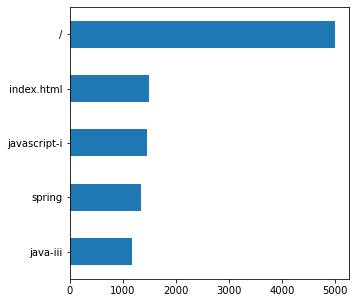

In [18]:
rp_df['count'].sort_values().tail(5).plot.barh(figsize=(5, 5))

In [19]:
cohort_given_path = (
    df.groupby('path')
    .cohort_id.value_counts(normalize=True)
    .rename('proba_status_given_path')
    .reset_index()
)
cohort_given_path.value_counts()

path                                cohort_id  proba_status_given_path
/                                   1.0        0.060340                   1
java-iii/sessions-and-cookies       1.0        0.016556                   1
java-iii/passwords                  23.0       0.108108                   1
                                    28.0       0.117117                   1
java-iii/servlets                   1.0        0.040609                   1
                                                                         ..
classification/knn                  28.0       1.000000                   1
classification/logistic-regression  28.0       1.000000                   1
classification/overview             22.0       0.001709                   1
                                    28.0       0.998291                   1
web-design/ux/purpose               14.0       1.000000                   1
Length: 3207, dtype: int64

In [20]:
cohort_given_path[cohort_given_path.proba_status_given_path < 1]

,path,cohort_id,proba_status_given_path
0,/,28.0,0.458342
1,/,22.0,0.281718
2,/,23.0,0.068931
3,/,21.0,0.066334
4,/,1.0,0.060340
...,...,...,...
3200,web-design/ui/color,28.0,0.142857
3201,web-design/ui/typography,14.0,0.571429
3202,web-design/ui/typography,28.0,0.428571
3204,web-design/ux/layout,14.0,0.777778


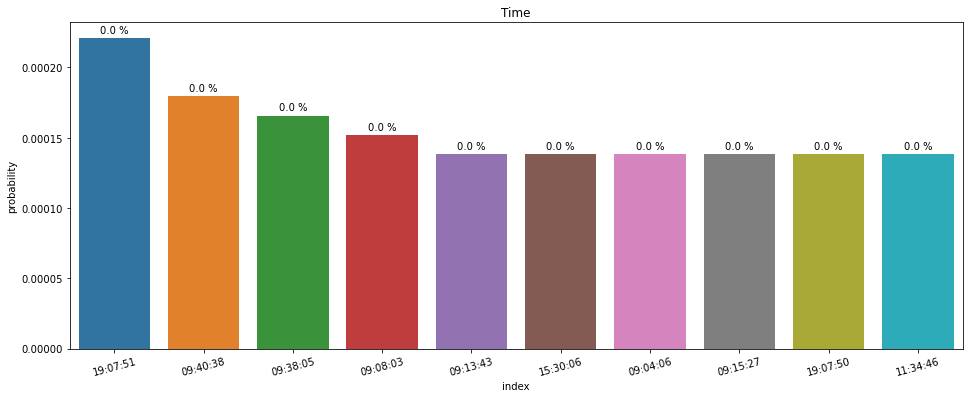

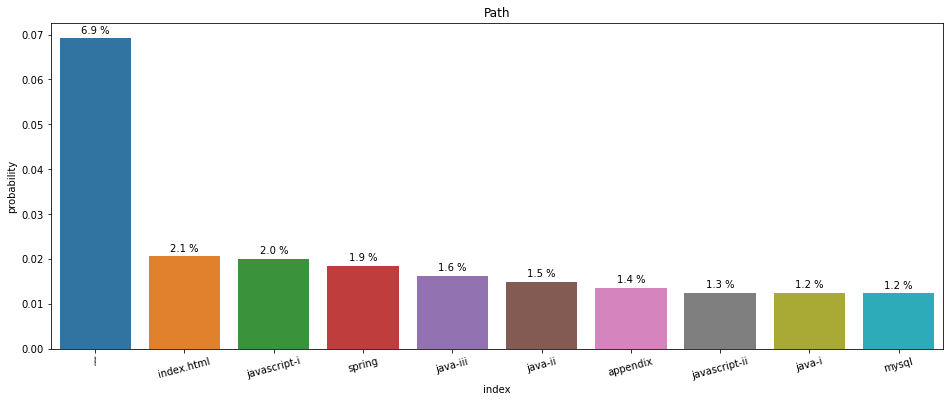

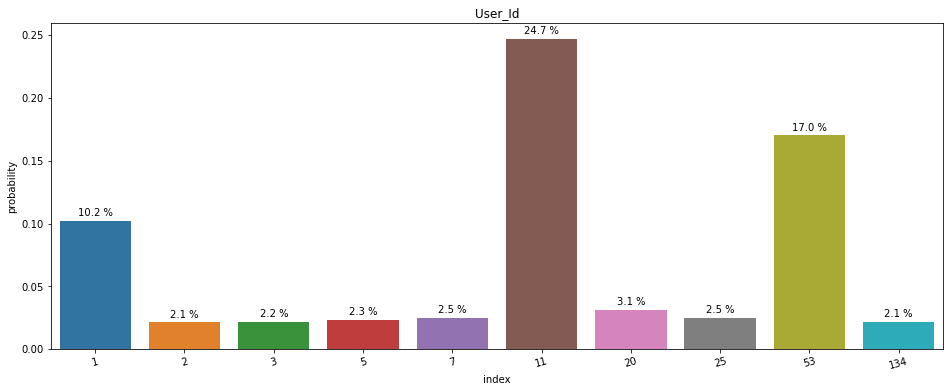

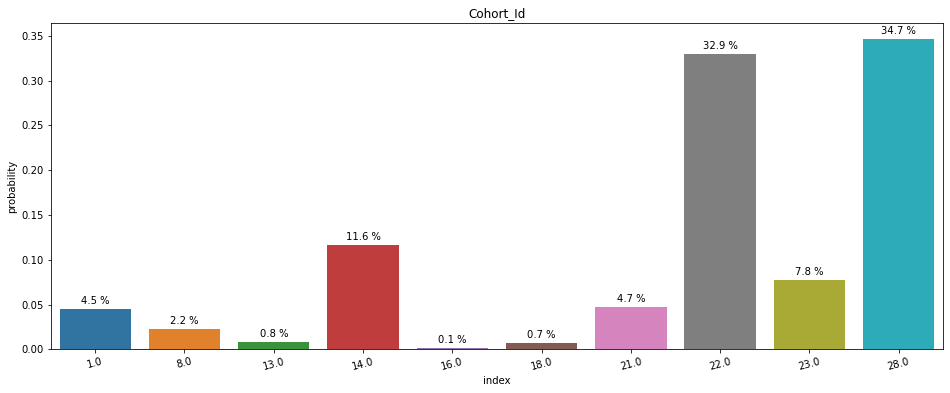

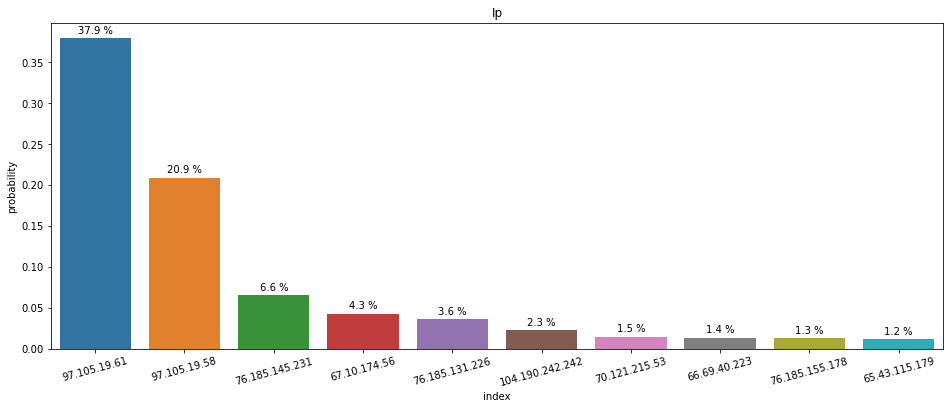

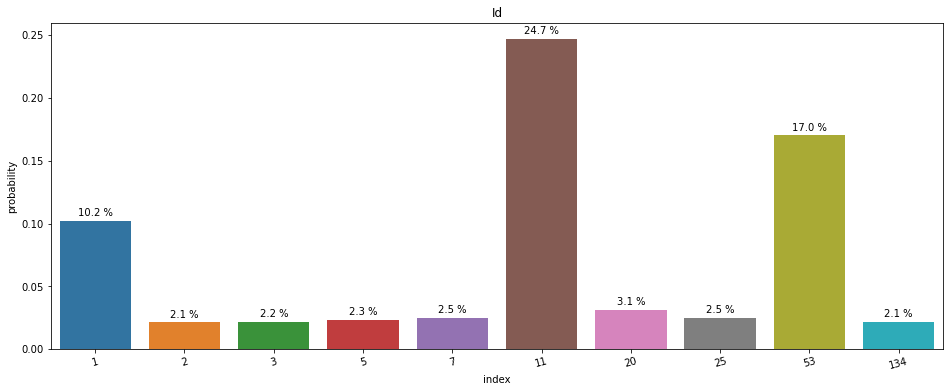

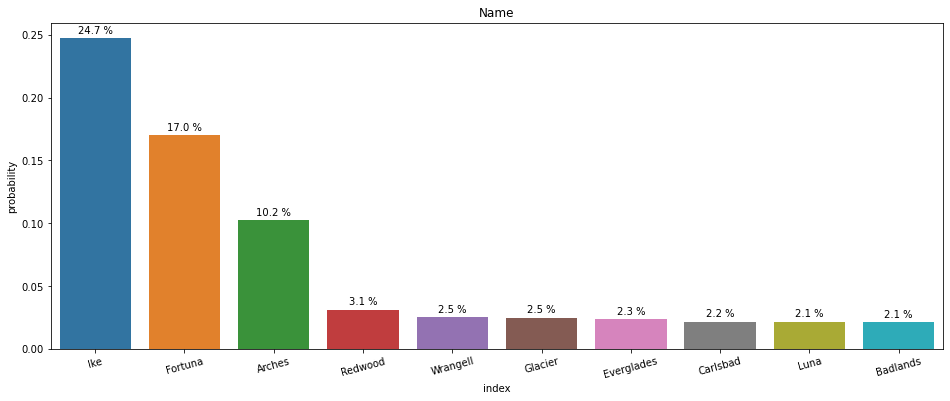

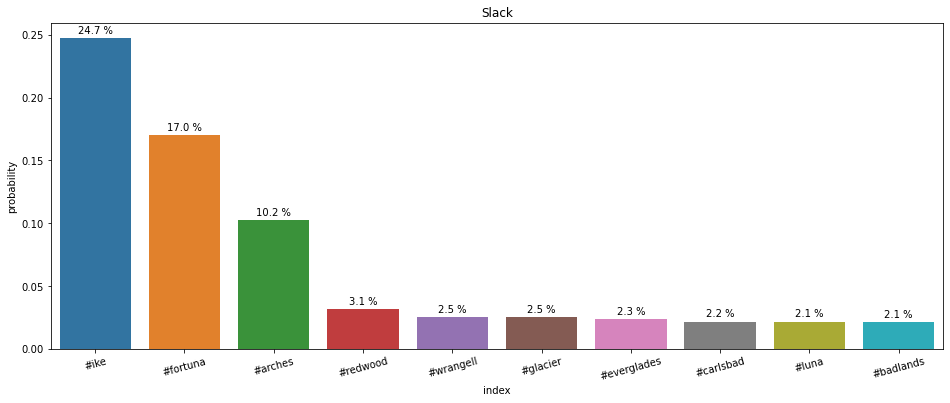

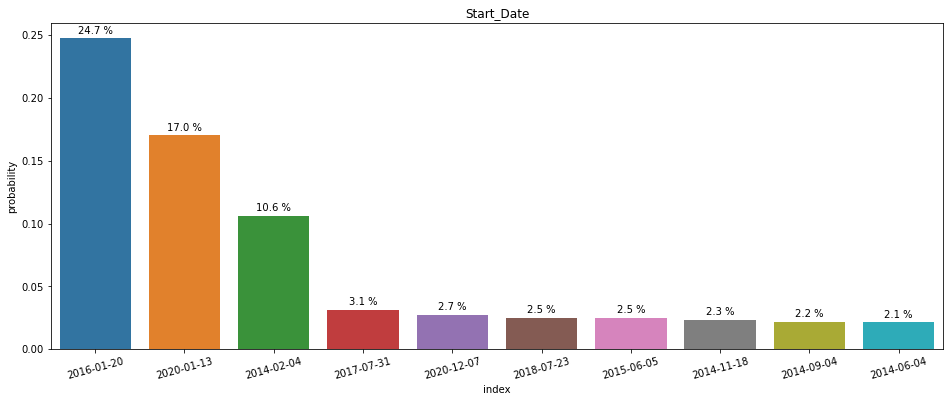

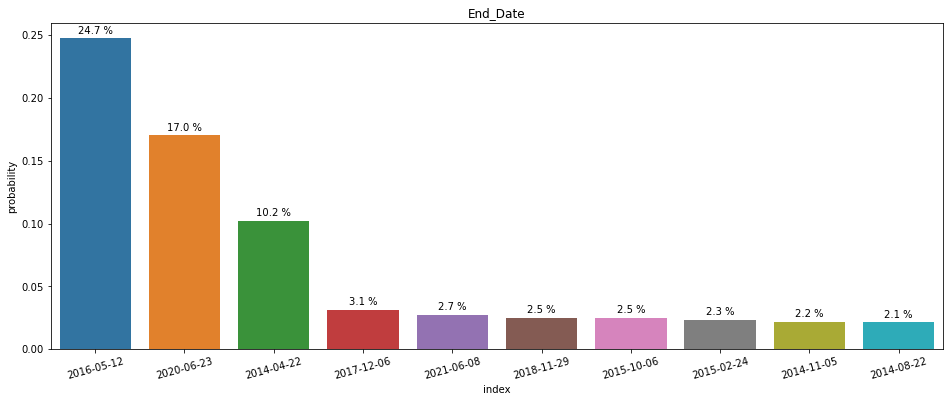

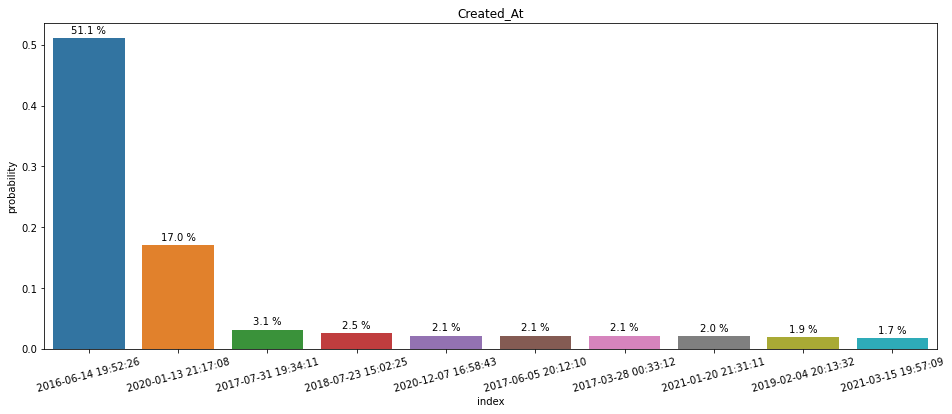

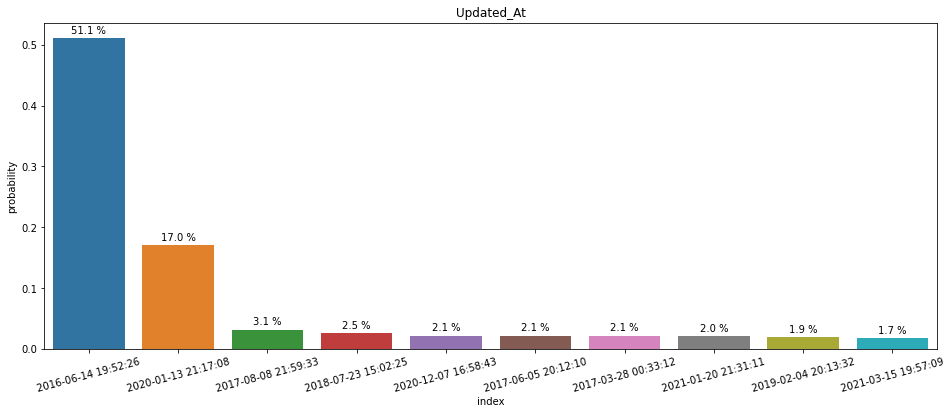

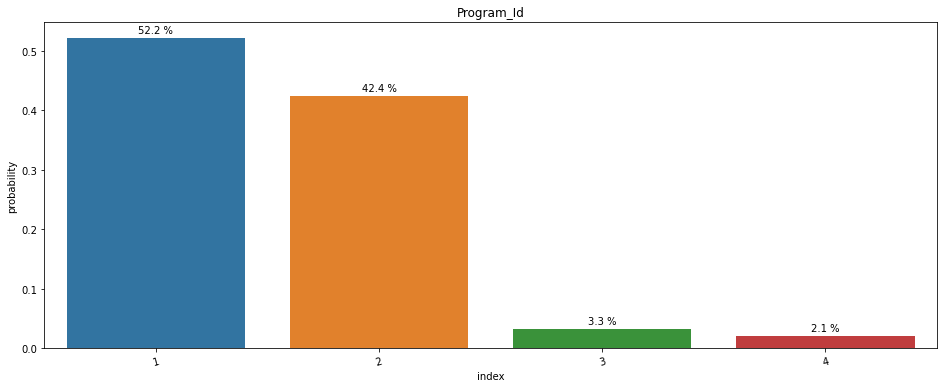

In [25]:
for col in df.columns:
    plt.figure(figsize=(16, 6))
    splot = sns.barplot(x='index', y=col, data=df[col].value_counts(normalize=True).reset_index().sort_values(
        by=col, ascending=False).head(10))
    for p in splot.patches:
        splot.annotate(format(p.get_height() * 100, '.1f') + ' %', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, 8), 
                   textcoords = 'offset points')
    plt.xticks(rotation=15)
    plt.title(col.title())
    plt.ylabel('probability')
    plt.show()

In [30]:
cohort_given_path = (
    df.groupby('path')
    .cohort_id.value_counts(normalize=True)
    .rename('proba_status_given_path')
    .reset_index()
)
cohort_given_path.head

<bound method NDFrame.head of                           path  cohort_id  proba_status_given_path
0                            /       28.0                 0.458342
1                            /       22.0                 0.281718
2                            /       23.0                 0.068931
3                            /       21.0                 0.066334
4                            /        1.0                 0.060340
...                        ...        ...                      ...
3202  web-design/ui/typography       28.0                 0.428571
3203     web-design/ui/visuals       14.0                 1.000000
3204      web-design/ux/layout       14.0                 0.777778
3205      web-design/ux/layout       28.0                 0.222222
3206     web-design/ux/purpose       14.0                 1.000000

[3207 rows x 3 columns]>

In [26]:
df2 = df[["cohort_id", "name"]]


In [27]:
df2.value_counts()

cohort_id  name                                  
28.0       Ike                                       15178
14.0       Fortuna                                    8197
28.0       Arches                                     5787
           Fortuna                                    4132
1.0        Ike                                        2735
22.0       Redwood                                    2263
           Glacier                                    1803
           Everglades                                 1701
8.0        Arches                                     1617
22.0       Carlsbad                                   1562
23.0       Luna                                       1549
22.0       Badlands                                   1541
           Quincy                                     1533
           Pinnacles                                  1532
23.0       Marco                                      1459
22.0       Franklin                                   1408
      